In [3]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
import pickle
import re

In [4]:
with open('dasan_structured_final.bin','rb') as f:
    df1 = pickle.load(f)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4214079 entries, 11126169 to 15396149
Data columns (total 13 columns):
 #   Column         Dtype         
---  ------         -----         
 0   datetime       datetime64[ns]
 1   ctype          object        
 2   regist1        object        
 3   regist2        object        
 4   rdepart        object        
 5   pdepart        object        
 6   cate1          object        
 7   cate2          object        
 8   cate3          object        
 9   dist1          object        
 10  dist2          object        
 11  regist_method  object        
 12  delimiter      object        
dtypes: datetime64[ns](1), object(12)
memory usage: 450.1+ MB


In [8]:
df1 = df1[df1['cate1'] == '코로나19']

In [9]:
with open('df_CN_stopword_final.bin','rb') as f:
    df2 = pickle.load(f)

In [10]:
df3 = pd.merge(df1,df2, left_index = True, right_index = True)

In [77]:
stop_word2 = ['습니다','합니다','있는','하고','하는','존경하는','신고위치','제가','하여','2020','드렸','드립니다','한다','한','서울','되어','안전신문고', '앱', '촬영', '사진', '또는', '됨', '없는','경로','파일','지역','인원','있다','저장']

In [14]:
stop_word2 = pd.read_csv('csv_file/불용어리스트_v1.csv')

In [78]:
for i in range(0,df3.shape[0]) :
    if i%1000 == 0 :
        print(i)
    for j in range(len(df3['CN'][i])-1,-1,-1) : 
        if df3['CN'][i][j] in stop_word2:
            del(df3['CN'][i][j])

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000


# 모델링

In [54]:
import logging
logging.basicConfig(
    format='%(asctime)s : %(levelname)s : %(message)s', 
    level=logging.INFO)

In [79]:
model = Word2Vec(sentences = df3['CN'],  # 입력할 문장, 각 문장별로 리스트 형식에 단어들이 나열 되어있는 상태
                 size=200,          # 각 단어별 차원의 크기
                 window = 10,       # 앞 뒤 단어를 몇개까지 고려할 것인가?
                 min_count=5,      # 최소 n번 이상 나온 단어만 선택하겠다
                 workers=4,         # 동시에 처리할 작업 수(코어 수와 비슷하게 설정)
                 iter=20,           # n번 학습
                 sg=1)              # 1이면 skip gram 사용

ished; awaiting finish of 3 more threads
2021-01-29 16:07:42,659 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-01-29 16:07:42,788 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-01-29 16:07:42,838 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-01-29 16:07:42,839 : INFO : EPOCH - 3 : training on 1055349 raw words (946745 effective words) took 6.7s, 141806 effective words/s
2021-01-29 16:07:43,847 : INFO : EPOCH 4 - PROGRESS: at 15.94% examples, 141439 words/s, in_qsize 7, out_qsize 0
2021-01-29 16:07:44,869 : INFO : EPOCH 4 - PROGRESS: at 32.18% examples, 144616 words/s, in_qsize 7, out_qsize 0
2021-01-29 16:07:45,902 : INFO : EPOCH 4 - PROGRESS: at 48.65% examples, 147915 words/s, in_qsize 7, out_qsize 0
2021-01-29 16:07:46,984 : INFO : EPOCH 4 - PROGRESS: at 66.37% examples, 149203 words/s, in_qsize 7, out_qsize 0
2021-01-29 16:07:47,986 : INFO : EPOCH 4 - PROGRESS: at 82.41% examples, 149591 words/s, in_qsize 

In [42]:
model.save('word2vec_covid.model')

2021-01-29 15:21:56,121 : INFO : saving Word2Vec object under word2vec_covid.model, separately None
2021-01-29 15:21:56,122 : INFO : not storing attribute vectors_norm
2021-01-29 15:21:56,123 : INFO : not storing attribute cum_table
2021-01-29 15:21:56,667 : INFO : saved word2vec_covid.model


In [ ]:
model.wv.save_word2vec_format('naver_w2v_100d')  # 모델 저장


In [2]:
# 모델 불러오기
model = Word2Vec.load('word2vec.model')

In [ ]:
# 가까운 단어 확인
model.wv.most_similar('코로나', topn= 100) 

In [ ]:
model.wv.most_similar('폐렴', topn= 50) 

In [21]:
# 사용 된 단어 수
len(model.wv.vocab)   

13490

In [34]:
covid_words = ['확산', '신종', '거리두기', '확진', '전염', '방역수칙', '격상', '바이러스', '사회적거리', '질본', '비말', '미착용',
               '창궐', '발열', '마스크', '대면', '역학', '체온', '검진', '선별진료소', '잠복기', '질병관리', '손소독', '코로나', '우한']

In [83]:
len(covid_words)

25

In [15]:
text = df3['CN'].apply(lambda x : ' '.join(x))

In [16]:
text = text.reset_index()

In [ ]:
text.head()

In [18]:
text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191581 entries, 0 to 2191580
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   serial  object
 1   CN      object
dtypes: object(2)
memory usage: 33.4+ MB


In [82]:
if 'b' in 'aabaa' :
    print('exist')

exist


In [70]:
bool_방역수칙 = []

for i in range(text.shape[0]) :
    if i%1000 == 0 : 
        print(i)    
    if re.search('방역수칙',text.iloc[i,1]) :
        bool_방역수칙.append(text.iloc[i,0])


0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000


In [153]:
len(index_확산)

3930

In [19]:
text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191581 entries, 0 to 2191580
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   serial  object
 1   CN      object
dtypes: object(2)
memory usage: 33.4+ MB


In [ ]:
df3.loc[search_코로나,:]

In [20]:
for i in covid_words :
    print(i)
    list1 = []
    for j in range(text.shape[0]) :
        if j%1000 == 0 : 
            print(i + ':' + str(j))
        if re.search(i,text.iloc[j,1]) :
            list1.append(text.iloc[j,0])
    globals()['bool_{}'.format(i)] = list1

:311000
우한:312000
우한:313000
우한:314000
우한:315000
우한:316000
우한:317000
우한:318000
우한:319000
우한:320000
우한:321000
우한:322000
우한:323000
우한:324000
우한:325000
우한:326000
우한:327000
우한:328000
우한:329000
우한:330000
우한:331000
우한:332000
우한:333000
우한:334000
우한:335000
우한:336000
우한:337000
우한:338000
우한:339000
우한:340000
우한:341000
우한:342000
우한:343000
우한:344000
우한:345000
우한:346000
우한:347000
우한:348000
우한:349000
우한:350000
우한:351000
우한:352000
우한:353000
우한:354000
우한:355000
우한:356000
우한:357000
우한:358000
우한:359000
우한:360000
우한:361000
우한:362000
우한:363000
우한:364000
우한:365000
우한:366000
우한:367000
우한:368000
우한:369000
우한:370000
우한:371000
우한:372000
우한:373000
우한:374000
우한:375000
우한:376000
우한:377000
우한:378000
우한:379000
우한:380000
우한:381000
우한:382000
우한:383000
우한:384000
우한:385000
우한:386000
우한:387000
우한:388000
우한:389000
우한:390000
우한:391000
우한:392000
우한:393000
우한:394000
우한:395000
우한:396000
우한:397000
우한:398000
우한:399000
우한:400000
우한:401000
우한:402000
우한:403000
우한:404000
우한:405000
우한:406000
우한:407000
우한:408000
우한:409000
우한:410000
우한

In [79]:
word_list = []
len_list = []
for i in covid_words :
    word_list.append(i)
    len_list.append(len(eval('bool_' + '{}'.format(i))))

In [80]:
pd.DataFrame({'word':word_list, 'len':len_list}).to_csv('단어별_민원수.csv', encoding = 'utf-8-sig', index = False)

In [100]:
index_final = set(bool_확산 + bool_신종 + bool_거리두기 + bool_확진 + bool_전염 + bool_방역수칙 + bool_격상 + bool_바이러스 + bool_사회적거리 + bool_질본 + bool_비말 + bool_미착용 + bool_창궐 + bool_발열 + bool_마스크 + bool_대면 + bool_역학 + bool_체온 + bool_검진 + bool_선별진료소 + bool_잠복기 + bool_질병관리 + bool_손소독 + bool_코로나 + bool_우한 + bool_코로나19)

In [101]:
len(list(index_final))

69323

In [102]:
pd.Series(list(index_final)).to_csv('코로나민원_index.csv', encoding= 'utf-8-sig', index= False)

In [ ]:
df3.loc[bool_코로나19,'CN']

In [104]:
df4 = df3.loc[list(index_final),:]

In [105]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69323 entries, 14160935 to 15295009
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   datetime       69323 non-null  datetime64[ns]
 1   ctype          69323 non-null  object        
 2   regist1        69323 non-null  object        
 3   regist2        69323 non-null  object        
 4   rdepart        69323 non-null  object        
 5   pdepart        69323 non-null  object        
 6   cate1          69323 non-null  object        
 7   cate2          69323 non-null  object        
 8   cate3          69323 non-null  object        
 9   dist1          69323 non-null  object        
 10  dist2          69323 non-null  object        
 11  regist_method  69323 non-null  object        
 12  delimiter      69323 non-null  object        
 13  CN             69323 non-null  object        
dtypes: datetime64[ns](1), object(13)
memory usage: 7.9+ MB


In [106]:
with open("코로나민원.bin", "wb" ) as file:
    pickle.dump(df4, file)

In [ ]:
df4['ctype'].value_counts()

In [ ]:
df4['regist1'].value_counts()

In [ ]:
df4['regist2'].value_counts()

In [ ]:
df4['rdepart'].value_counts()

In [ ]:
df4['pdepart'].value_counts()

In [ ]:
df4['cate1'].value_counts()

In [ ]:
df4['cate2'].value_counts()

In [ ]:
df4['cate3'].value_counts()

In [ ]:
df4['dist1'].value_counts()

In [ ]:
df4['dist2'].value_counts()

In [120]:
from datetime import datetime

In [123]:
df4['date'] = df4['datetime'].apply(lambda x : datetime.strftime(x,'%Y-%m-%d'))

In [122]:
df4.to_csv('코로나민원.csv', encoding = 'utf-8-sig', index = False)

In [ ]:
df4.groupby([df4['date'].str[:7],'ctype'])['CN'].count()

# pca로 시각화

In [22]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['axes.unicode_minus'] = False

In [23]:
import matplotlib.font_manager as fm
fm._rebuild()

plt.rc('font', family='NanumGothic')

2021-01-29 15:50:28,877 : INFO : Generating new fontManager, this may take some time...


In [48]:
#vocab = list(model.wv.vocab)

In [48]:
#vocab = covid_words

NameError: name 'covid_words' is not defined

In [80]:
word_list = []
for i in df3['CN'] : 
    word_list += i
len(word_list)

1055349

In [88]:
#pd.Series(word_list).value_counts().to_csv('csv_file/코로나19_wordcount.csv', encoding = 'utf-8-sig ')

In [197]:
df_word = pd.read_csv('csv_file/코로나19_wordcount.csv', names = ['word','count'], skiprows = 1)

In [198]:
df_word['word'][:100]

0      민원
1     코로나
2     마스크
3      휴대
4      방법
     ... 
95     보호
96     정부
97    손님들
98     주민
99     공원
Name: word, Length: 100, dtype: object

In [199]:
X = model[df_word['word'][:100]]

/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [200]:
vocab_show = df_word['word'][:100]

In [201]:
#X = model[vocab]

In [202]:
#vocab_show = vocab[:100]

In [203]:
X_show = X[:100,:]

In [204]:
m_pca = PCA(n_components=2)
m_pca.fit(X_show)
x_pca = m_pca.transform(X_show)

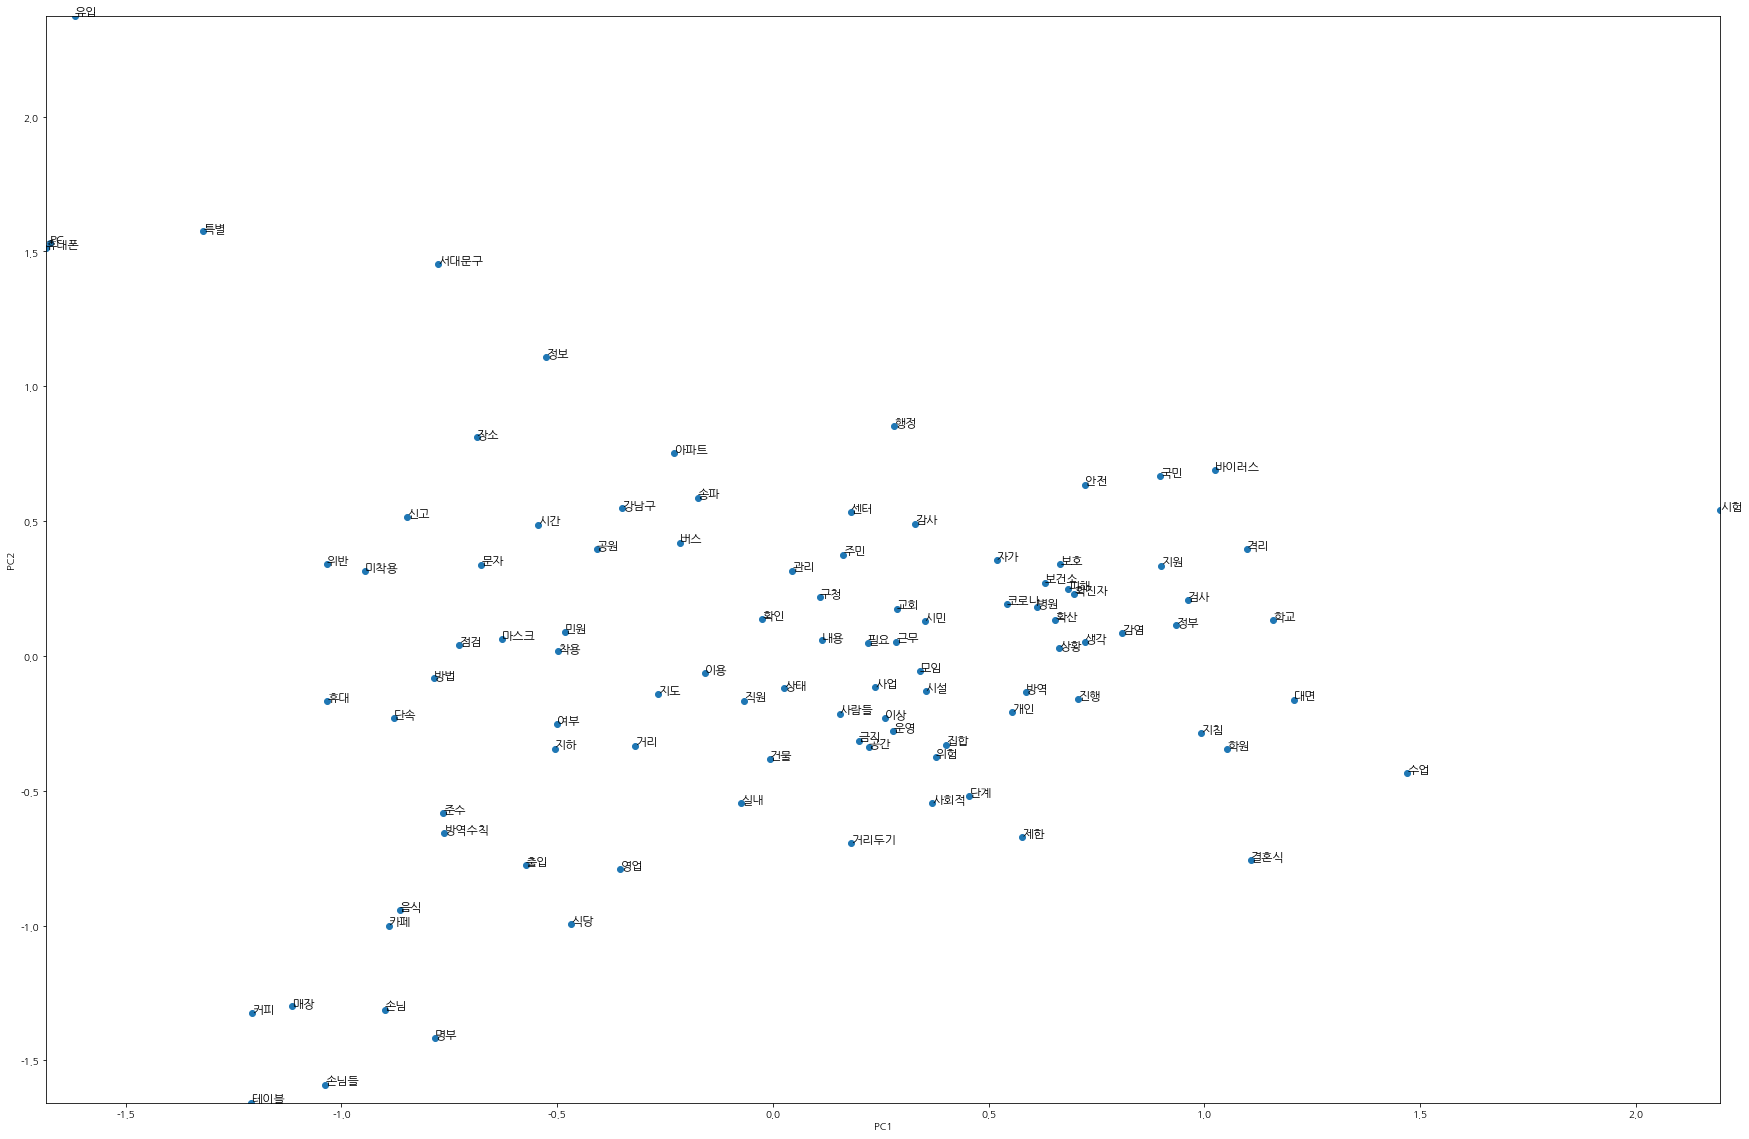

In [205]:
df = pd.DataFrame(x_pca, index=vocab_show, columns=['x', 'y']) 
fig = plt.figure() 
fig.set_size_inches(30,20)
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(df['x'], df['y'])
plt.xlim(x_pca[:, 0].min(), x_pca[:, 0].max()) 
plt.ylim(x_pca[:, 1].min(), x_pca[:, 1].max()) 
for i in range(len(X_show)): plt.text(x_pca[i, 0], x_pca[i, 1], str(vocab_show[i]), 
                                      fontdict={#'weight': 'bold', 
                                                'size': 12}) 
plt.xlabel("PC1") 
plt.ylabel("PC2") 
plt.show()

In [169]:
plt.savefig('word2vec_pca_코로나19.png' )

<Figure size 432x288 with 0 Axes>

In [38]:
코로나_top100 = model.wv.most_similar('코로나', topn= 200)

In [39]:
코로나_top100 = list(pd.DataFrame(코로나_top100).iloc[:,0])

In [40]:
코로나_top100 = 코로나_top100 + ['코로나']

In [41]:
마스크_top100 = model.wv.most_similar('코로나', topn= 200)

In [42]:
마스크_top100 = list(pd.DataFrame(마스크_top100).iloc[:,0])

In [43]:
vocab = list(set(코로나_top100 + 마스크_top100))

In [2]:
vocab[:11]

NameError: name 'vocab' is not defined

In [241]:
vocab = ['줌바', '격리', '스터디', '예배', '위중한', '대면', '우한', '증상', '재택', '확진', '역학', '아르바이트', '보건', '수칙', '확산', '입국', '잠복기', '취식', '피씨방', '독감', 
        '전염', '체온', '바글바글', '시국', '접종', '행사를', '비말', '접촉', '지침', '선별진료소', '발열체크', '기침', '질본', '질병관리', '질병', '결혼식', '코로나', '휴관', '인원',
        '실외', '감염자가', '방역수칙', '방역', '격상', '방역지침', '콜라텍', '감기', '큐알', '보건소', '마스크', '모이는', '메르스', '휴업', '감염', '집합', '민감', '회원들', '신종',
        '확진자', '팬데믹', '검진', '조심', '예약', '발병', '간병인', '실습', '유흥업소', '다닥다닥', '업종', '면역력', '창궐', '잠정', '모임', '수업', '손소독', '유행', '발열', '해외',
        '개학', '휴강', '손소독제', '전파', '간염', '환자들', '사회적거리', '착용', '외출', '밀폐', '휴원', '병', '질병관리본부', '거리두기', 'QR코드', '밀폐된', '실내', '바이러스',                 '종교시설', '선별진료', '야외', '미착용']

# 전체단어 top

In [164]:
with open('df_CN_stopword_final.bin','rb') as f:
    df2 = pickle.load(f)

In [ ]:
df2.head()

In [65]:
word_list = []
num = 0
for i in df1['CN'] :
    num += 1
    if num%1000 == 0 :
        print(num)
    word_list += i

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000


In [171]:
del df2

In [66]:
len(word_list)

7302597

In [67]:
s1 = pd.Series(word_list)

In [68]:
df_word_count = s1.value_counts().reset_index()

In [75]:
df_word_count['index'][:200]

0      습니다
1        도
2       하고
3      코로나
4       민원
      ... 
195     즉시
196     도시
197     인지
198     아이
199     여부
Name: index, Length: 200, dtype: object

In [132]:
for i in df_word_count['index'][:300] :
    print("'" + i + "',")

'습니다',
'도',
'하고',
'코로나',
'민원',
'있는',
'합니다',
'하는',
'한',
'수',
'서울',
'마스크',
'안',
'해',
'할',
'면',
'단속',
'하여',
'한다',
'까지',
'드립니다',
'랍니다',
'되어',
'조치',
'주민',
'등',
'요청',
'된',
'문제',
'상황',
'행정',
'영업',
'시민',
'것',
'마스크를',
'적',
'방법',
'버스',
'부탁',
'공사',
'구청',
'생각',
'신고',
'휴대',
'없는',
'관리',
'정보',
'했는데',
'때문에',
'시간',
'많은',
'사업',
'감염',
'바이러스',
'진행',
'해야',
'있어',
'지원',
'감사',
'위례',
'a',
'문자',
'처리',
'계획',
'피해',
'차량',
'이관',
'2020',
'못하',
'기간',
'지도',
'제가',
'없이',
'강남구',
'사람들이',
'길',
'도로',
'필요',
'검사',
'주시기',
'방역',
'국민',
'지금',
'안전',
'구',
'사진',
'아파트',
'센터',
'촬영',
'거리두기',
'지하',
'왜',
'역',
'운영',
'있다',
'접수',
'담당',
'앞',
'불법',
'착용',
'자가',
'불',
'협의',
'답변',
'알고',
'장소',
'내용',
'설치',
'우리',
'음식',
'신고위치',
'지역',
'있도록',
'다시',
'빠른',
'업무',
'금지',
'병원',
'년',
'소극',
'강동구',
'사람들',
'생활',
'위반',
'지연',
'특별',
'추진',
'모든',
'확진자',
'이상',
'확인',
'집',
'아니라',
'저희',
'단계',
'건물',
'미착용',
'비',
'시설',
'사람이',
'보다',
'주차',
'학교',
'일을',
'선',
'재건축',
'상태',
'해당',
'이용',
'바',
'주민들',
'단축을',
'교통',
'될',
'직원',
'안전신문고',
'않는',
'교육',
'소음',
'이해',
'않아',
'받고',
'불편',
'근무',
'공무

In [181]:
df_word_count.iloc[:201,0].to_csv('전체단어상위200.csv', encoding = 'utf-8-sig', index = False)

In [231]:
vocab = pd.read_csv('전체단어상위200.csv')

In [172]:
vocab = ['코로나','민원','서울','마스크','단속','조치','주민','요청','문제','상황','영업','시민','방법','버스','부탁','구청','생각','신고','휴대','관리','정보','시간','사업',           '감염','바이러스','진행','지원','감사','처리','피해','차량','이관','기간','지도','필요','검사','방역','국민','지금','안전','아파트','센터',
         '거리두기','지하','역','운영','불법','자가','답변','장소','내용','설치','우리','음식','신고위치','지역','업무','금지','병원','사람들','생활',
         '위반','특별','확진자','방역수칙','집','단계','건물','미착용','시설','학교','상태','이용','주민들','교통','직원','교육','불편','근무','공무원','보건소','교회','사회적','확산','책임','아이','출입','시기','카페','위험','제한','회사','폐쇄','학원','국가','사태','식당','과태료','긴급','불안']

In [173]:
len(vocab)

100

In [174]:
X = model[vocab]

/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [175]:
X_show = X[:100,:]

In [176]:
vocab_show = vocab[:100]

In [177]:
m_pca = PCA(n_components=2)
m_pca.fit(X_show)
x_pca = m_pca.transform(X_show)

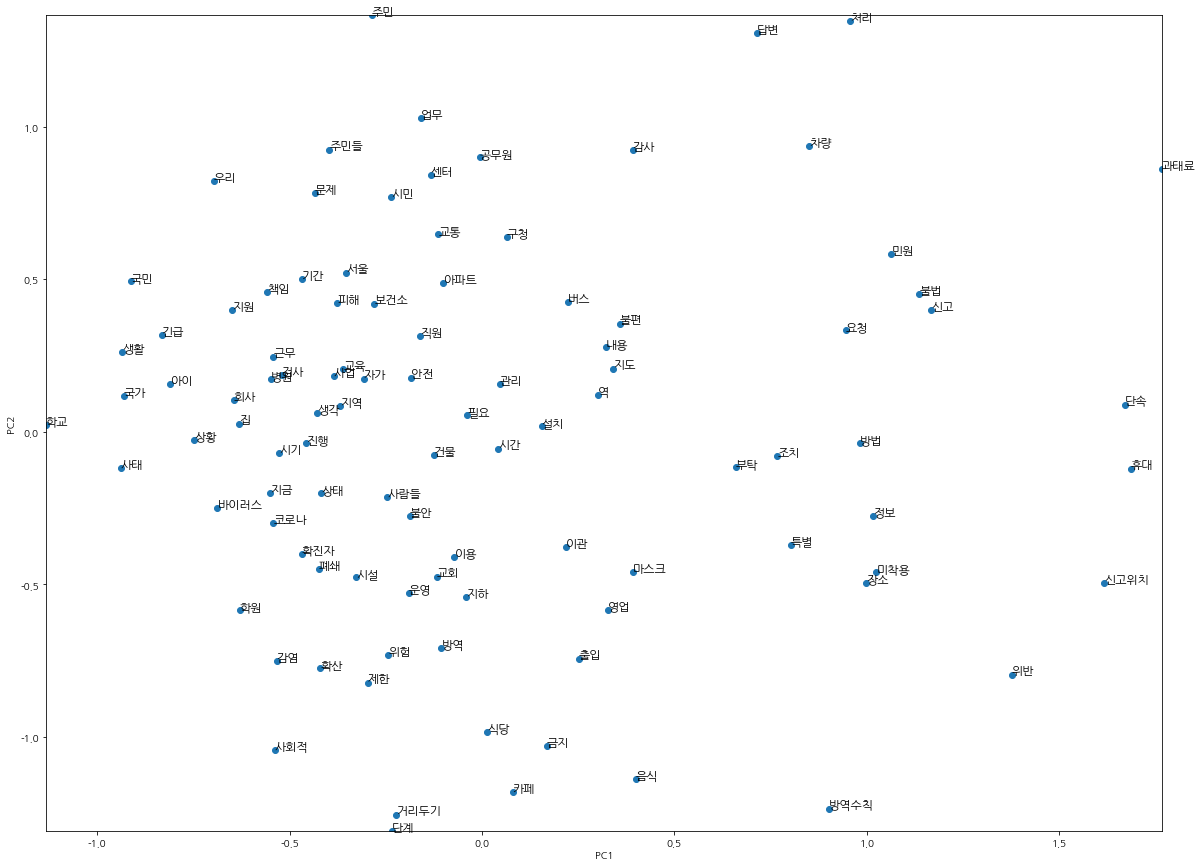

In [178]:
df = pd.DataFrame(x_pca, index=vocab_show, columns=['x', 'y']) 
fig = plt.figure() 
fig.set_size_inches(20, 15)
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(df['x'], df['y'])
plt.xlim(x_pca[:, 0].min(), x_pca[:, 0].max()) 
plt.ylim(x_pca[:, 1].min(), x_pca[:, 1].max()) 
for i in range(len(X_show)): plt.text(x_pca[i, 0], x_pca[i, 1], str(vocab_show[i]), 
                                      fontdict={#'weight': 'bold', 
                                                'size': 12}) 
plt.xlabel("PC1") 
plt.ylabel("PC2") 
plt.show()

# tf-idf

In [20]:
import pandas as pd
import dask as dd
import pickle

In [21]:
with open('코로나민원.bin','rb') as f :
    민원 = pickle.load(f)

In [ ]:
민원.head()

In [26]:
corpus = list(민원['CN'].apply(lambda x : ' '.join(x)))

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [31]:
m_vector = CountVectorizer()
m_vector.fit_transform(corpus)
#m_vector.vocabulary_


<69323x120520 sparse matrix of type '<class 'numpy.int64'>'
	with 4429250 stored elements in Compressed Sparse Row format>

In [32]:
tfidfv = TfidfVectorizer().fit(corpus)
tfidfv.transform(corpus)
#tfidfv.vocabulary_

<69323x120520 sparse matrix of type '<class 'numpy.float64'>'
	with 4429250 stored elements in Compressed Sparse Row format>